In [2]:
import keras
import numpy as np
import pandas as pd 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.models import load_model
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [4]:
testX = pd.read_csv('x_test.csv')
testy = pd.read_csv('y_test.csv')
trainX = pd.read_csv('x_train.csv')
trainy = pd.read_csv('y_train.csv')

In [5]:
trainX.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=784)

In [6]:
#importing the datasets
# testX = pd.read_csv('x_test.csv')
# testy = pd.read_csv('y_test.csv')
# trainX = pd.read_csv('x_train.csv')
# trainy = pd.read_csv('y_train.csv')
# trainy

In [7]:
trainy.set_axis(["Label"],axis=1,inplace=True)

In [8]:
trainy["Label"].unique()

array([4, 0, 2, 3, 1], dtype=int64)

In [9]:
# Reshaping x_train into 28*28 and setting channels=1.
trainX = trainX.values.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.values.reshape((testX.shape[0], 28, 28, 1))
print('x_train:', trainX.shape)
print('x_test:', testX.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)


In [10]:
#prepare the pixel values by first converting the x_train and x_test into float type
#and then rescaling them between 0 and 1 by dividing them by 255
trainX = trainX.astype("float32")/255
testX = testX.astype("float32")/255

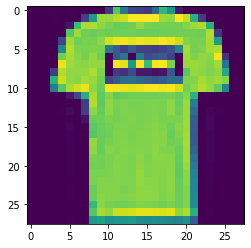

In [11]:
imgtest = trainX[1].reshape((28,28))
plt.imshow(imgtest)
plt.show()

# CM1

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

In [13]:
# compile model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [15]:
hist=model.fit(trainX, trainy, validation_split=0.20, epochs=12, verbose=1)
model.summary()

Epoch 1/12
1500/1500 - 21s - loss: 0.1462 - accuracy: 0.9482 - val_loss: 0.1891 - val_accuracy: 0.9318 - 21s/epoch - 14ms/step
Epoch 2/12
1500/1500 - 20s - loss: 0.1287 - accuracy: 0.9545 - val_loss: 0.2004 - val_accuracy: 0.9323 - 20s/epoch - 13ms/step
Epoch 3/12
1500/1500 - 21s - loss: 0.1154 - accuracy: 0.9594 - val_loss: 0.1920 - val_accuracy: 0.9315 - 21s/epoch - 14ms/step
Epoch 4/12
1500/1500 - 20s - loss: 0.1034 - accuracy: 0.9630 - val_loss: 0.1910 - val_accuracy: 0.9366 - 20s/epoch - 13ms/step
Epoch 5/12
1500/1500 - 20s - loss: 0.0938 - accuracy: 0.9672 - val_loss: 0.2016 - val_accuracy: 0.9342 - 20s/epoch - 13ms/step
Epoch 6/12
1500/1500 - 20s - loss: 0.0839 - accuracy: 0.9704 - val_loss: 0.2089 - val_accuracy: 0.9318 - 20s/epoch - 14ms/step
Epoch 7/12
1500/1500 - 20s - loss: 0.0776 - accuracy: 0.9731 - val_loss: 0.2220 - val_accuracy: 0.9331 - 20s/epoch - 13ms/step
Epoch 8/12
1500/1500 - 22s - loss: 0.0692 - accuracy: 0.9760 - val_loss: 0.2530 - val_accuracy: 0.9279 - 22s/ep

In [61]:
test_loss, test_acc = model.evaluate(testX, testy, verbose=1)
print("Test accuracy: ", test_acc)
test_acc_1Conv2D_Simple = test_acc
test_loss_1Conv2D_Simple = test_loss

313/313 - 2s - loss: 0.2743 - accuracy: 0.9249 - 2s/epoch - 6ms/step
Test accuracy:  0.9248999953269958


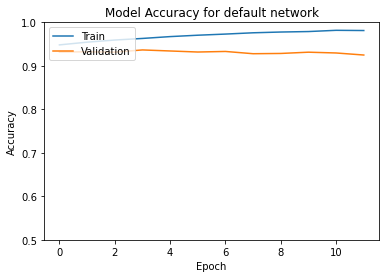

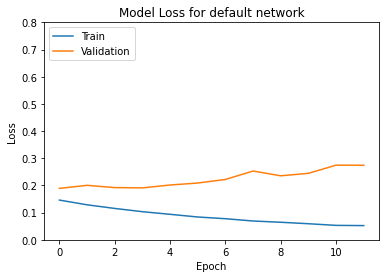

In [70]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0.5,1)
plt.title('Model Accuracy for default network')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0,0.8)
plt.title('Model Loss for default network')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(0,1)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# CM2

In [65]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), strides=(1, 1), padding='same'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1), strides=(1,1)))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1,1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.5))  
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))   
model2.add(Dense(5, activation='softmax'))

In [24]:
model2.summary(line_length = 100)

Model: "sequential_2"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_5 (Conv2D)                           (None, 28, 28, 32)                      320            
                                                                                                    
 conv2d_6 (Conv2D)                           (None, 26, 26, 128)                     36992          
                                                                                                    
 max_pooling2d_3 (MaxPooling2D)              (None, 13, 13, 128)                     0              
                                                                                                    
 batch_normalization_2 (BatchNormalization)  (None, 13, 13, 128)                     512            
                                                                     

In [25]:
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [26]:
hist2 =model2.fit(trainX, trainy, validation_split= 0.20, epochs=15, verbose=1)

Epoch 1/15
1500/1500 [==============================] - 114s 75ms/step - loss: 0.1335 - accuracy: 0.9511 - val_loss: 0.1451 - val_accuracy: 0.9491
Epoch 2/15
1500/1500 [==============================] - 90s 60ms/step - loss: 0.1269 - accuracy: 0.9537 - val_loss: 0.1514 - val_accuracy: 0.9470
Epoch 3/15
1500/1500 [==============================] - 97s 65ms/step - loss: 0.1260 - accuracy: 0.9540 - val_loss: 0.1541 - val_accuracy: 0.9473
Epoch 4/15
1500/1500 [==============================] - 108s 72ms/step - loss: 0.1208 - accuracy: 0.9553 - val_loss: 0.1509 - val_accuracy: 0.9482
Epoch 5/15
1500/1500 [==============================] - 99s 66ms/step - loss: 0.1149 - accuracy: 0.9568 - val_loss: 0.1610 - val_accuracy: 0.9423
Epoch 6/15
1500/1500 [==============================] - 99s 66ms/step - loss: 0.1188 - accuracy: 0.9565 - val_loss: 0.1467 - val_accuracy: 0.9495
Epoch 7/15
1500/1500 [==============================] - 100s 66ms/step - loss: 0.1119 - accuracy: 0.9587 - val_loss: 0.149

In [28]:
test_loss, test_acc = model2.evaluate(testX, testy, verbose=1)
print("Test accuracy: ", test_acc)
test_acc_3Conv2D_adam = test_acc
test_loss_3Conv2D_adam = test_loss

313/313 - 7s - loss: 0.1605 - accuracy: 0.9486 - 7s/epoch - 21ms/step
Test accuracy:  0.9485999941825867


## CM3

## Runtime performance for training and testing (+in terms of numbers):

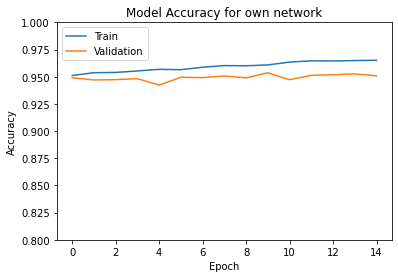

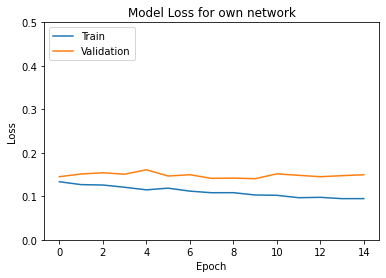

In [69]:
# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.ylim(0.8,1)
plt.title('Model Accuracy for own network')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.ylim(0,0.5)
plt.title('Model Loss for own network')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(0,1)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Different Optimizers

### 1. SGD

In [45]:
modelSGD = Sequential()
modelSGD.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1), padding = 'same', strides = (1,1), kernel_initializer='he_uniform'))
modelSGD.add(MaxPooling2D(2,2))
modelSGD.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1), padding = 'same', strides = (1,1), kernel_initializer='he_uniform'))
modelSGD.add(Dropout(0.25))
modelSGD.add(Flatten())
modelSGD.add(Dense(128, activation='relu'))
modelSGD.add(Dense(5, activation='softmax'))

In [46]:
modelSGD.compile(optimizer='SGD', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [47]:
histSGD =modelSGD.fit(trainX, trainy, validation_split = 0.20, epochs=15, verbose=1)

Epoch 1/15
1500/1500 [==============================] - 29s 19ms/step - loss: 0.4287 - accuracy: 0.8411 - val_loss: 0.3253 - val_accuracy: 0.8817
Epoch 2/15
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3014 - accuracy: 0.8911 - val_loss: 0.2763 - val_accuracy: 0.8997
Epoch 3/15
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2653 - accuracy: 0.9056 - val_loss: 0.2645 - val_accuracy: 0.9053
Epoch 4/15
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2424 - accuracy: 0.9137 - val_loss: 0.2350 - val_accuracy: 0.9134
Epoch 5/15
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2244 - accuracy: 0.9203 - val_loss: 0.2381 - val_accuracy: 0.9134
Epoch 6/15
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2120 - accuracy: 0.9246 - val_loss: 0.2143 - val_accuracy: 0.9237
Epoch 7/15
1500/1500 [==============================] - 31s 20ms/step - loss: 0.2022 - accuracy: 0.9276 - val_loss: 0.2070 -

In [48]:
test_loss, test_acc = modelSGD.evaluate(testX, testy, verbose=1)
print("Test accuracy: ", test_acc)
test_acc_1Conv2D_SGD = test_acc
test_loss_1Conv2D_SGD = test_loss

313/313 - 2s - loss: 0.1927 - accuracy: 0.9335 - 2s/epoch - 8ms/step
Test accuracy:  0.9334999918937683


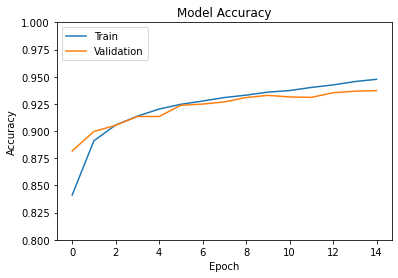

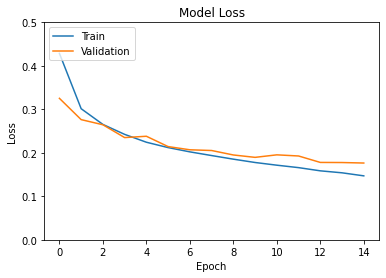

In [49]:
# summarize history for accuracy
plt.plot(histSGD.history['accuracy'])
plt.plot(histSGD.history['val_accuracy'])
plt.ylim(0.8,1)
plt.title('Model Accuracy for SGD optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histSGD.history['loss'])
plt.plot(histSGD.history['val_loss'])
plt.ylim(0,0.5)
plt.title('Model Loss for SGD optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(0,1)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### 2. RMSprop

In [52]:
modelRMS = Sequential()
modelRMS.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1), padding = 'same', strides = (1,1), kernel_initializer='he_uniform'))
modelRMS.add(MaxPooling2D(2,2))
modelRMS.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28,28,1), padding = 'same', strides = (1,1), kernel_initializer='he_uniform'))
modelRMS.add(Dropout(0.25))
modelRMS.add(Flatten())
modelRMS.add(Dense(128, activation='relu'))
modelRMS.add(Dense(5, activation='softmax'))

In [53]:
modelRMS.compile(optimizer='RMSprop', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [55]:
histRMS =modelRMS.fit(trainX, trainy, validation_split= 0.20, epochs=15, verbose=1)

Epoch 1/15
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2991 - accuracy: 0.8931 - val_loss: 0.2719 - val_accuracy: 0.9065
Epoch 2/15
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2312 - accuracy: 0.9188 - val_loss: 0.2405 - val_accuracy: 0.9120
Epoch 3/15
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2086 - accuracy: 0.9272 - val_loss: 0.2009 - val_accuracy: 0.9288
Epoch 4/15
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1985 - accuracy: 0.9331 - val_loss: 0.2424 - val_accuracy: 0.9205
Epoch 5/15
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1919 - accuracy: 0.9362 - val_loss: 0.2240 - val_accuracy: 0.9235
Epoch 6/15
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1884 - accuracy: 0.9371 - val_loss: 0.1960 - val_accuracy: 0.9358
Epoch 7/15
1500/1500 [==============================] - 32s 22ms/step - loss: 0.1851 - accuracy: 0.9373 - val_loss: 0.1976 -

In [56]:
test_loss, test_acc = modelRMS.evaluate(testX, testy, verbose=1)
print("Test accuracy: ", test_acc)
test_acc_1Conv2D_RMS = test_acc
test_loss_1Conv2D_RMS = test_loss

313/313 - 2s - loss: 0.2670 - accuracy: 0.9270 - 2s/epoch - 8ms/step
Test accuracy:  0.9269999861717224


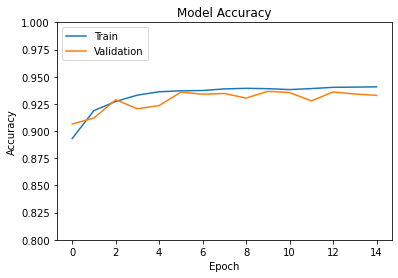

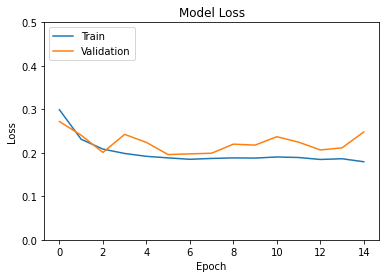

In [57]:
print("")
# summarize history for accuracy
plt.plot(histRMS.history['accuracy'])
plt.plot(histRMS.history['val_accuracy'])
plt.ylim(0.8,1)
plt.title('Model Accuracy for RMSprop optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histRMS.history['loss'])
plt.plot(histRMS.history['val_loss'])
plt.ylim(0,0.5)
plt.title('Model Loss for RMSprop optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(0,1)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Comparison for accuracy and loss of different models

In [63]:
comparison = pd.DataFrame({"Models": [], \
                           "Test Accuracy": []})
#comparison.loc[len(comparison.index)] = ["Model", test_acc_1Conv2D_Simple*100]
comparison.loc[len(comparison.index)] = ["Default Model", test_acc_1Conv2D_Simple*100]
comparison.loc[len(comparison.index)] = ["Own Network Model", test_acc_3Conv2D_adam*100]
comparison.loc[len(comparison.index)] = ["Model SGD", test_acc_1Conv2D_SGD*100]
comparison.loc[len(comparison.index)] = ["Model RMSprop", test_acc_1Conv2D_RMS*100]

print("Comparison for accuracy and loss for different models")
comparison

Comparison for accuracy and loss for different models


,Models,Test Accuracy
0,Default Model,92.490000
1,Own Network Model,94.859999
2,Model SGD,93.349999
3,Model RMSprop,92.699999


Clearly the best model is the Model Adam with 1 CNN with the highest accuracy : 93.769997

In [ ]:
#Changed hist1 to hist
train_loss=np.mean(hist.history['loss'])
val_loss=np.mean(hist.history['val_loss'])
train_acc=np.mean(hist.history['accuracy'])
val_acc=np.mean(hist.history['val_accuracy'])
print("Train accuracy for the best model is : ", train_acc)
print("Train loss for the best model is : ", train_loss)
print("Validation accuracy for the best model is : ", val_acc)
print("Validation loss for the best model is : ", val_loss)
# print("Test accuracy for the best model is : ", test_acc_1Conv2D_adam1)
# print("Test loss for the best model is : ", test_loss_1Conv2D_adam1)

In [ ]:
print("1 layer Conv2D and 1 dense output layer")
print("Test accuracy for the model with 1 layer Conv2D and 1 dense output layer is : ", test_acc_1Conv2D_Simple)
print("Test loss for the model with 1 layer Conv2D and 1 dense output layer is : ", test_loss_1Conv2D_Simple)
print("")
print("BEST MODEL-1 layer Conv2D ,1 dense layer and 1 dense output layer")
# print("Test accuracy for the model with 1 layer Conv2D ,1 dense layer and 1 dense output layer is : ", test_acc_1Conv2D_adam1)
# print("Test loss for the model with 1 layer Conv2D ,1 dense layer and 1 dense output layer is : ", test_loss_1Conv2D_adam1)
print("")
print("3 layer Conv2D ,1 dense layer and 1 dense output layer")
print("Test accuracy for the model with 3 layer Conv2D ,1 dense layer and 1 dense output layer is : ", test_acc_3Conv2D_adam)
print("Test loss for the model with 3 layer Conv2D ,1 dense layer and 1 dense output layer is : ", test_loss_3Conv2D_adam)

In [ ]:
# print("Adam")
# print("Test accuracy: ", test_acc_1Conv2D_adam1)
# print("Test loss: ", test_loss_1Conv2D_adam1)
print("")
print("SGD")
print("Test accuracy: ", test_acc_1Conv2D_SGD)
print("Test loss: ", test_loss_1Conv2D_SGD)
print("")
print("RMSprop")
print("Test accuracy: ", test_acc_1Conv2D_RMS)
print("Test loss: ", test_loss_1Conv2D_RMS)

In [ ]:
print("BEST MODEL-1 layer Conv2D ,1 dense layer and 1 dense output layer")
print("Training set")
# summarize history for accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# CM4

In [ ]:
# Changed model1 to model
extractor = keras.Model(inputs=model.inputs,
                        outputs= model.layers[-1].output)

In [ ]:
features = pd.DataFrame(extractor(testX[:1000]).numpy())

In [ ]:
for i in range(1,int(len(testX)/1000)):
    temp = pd.DataFrame(extractor(testX[i*1000:(i+1)*1000]).numpy())
    features = features.append(temp, ignore_index=True)

In [ ]:
features.columns